<a href="https://colab.research.google.com/github/GollyTicker/Food-Recognition-Challenge/blob/main/Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)

This dataset and notebook correspond to the [Food Recognition Challenge](https://www.aicrowd.com/challenges/food-recognition-challenge) being held on [AIcrowd](https://www.aicrowd.com/).

<p align="right"> Join the communty! <br><a href="https://discord.gg/GTckBMx"><img src="https://img.shields.io/discord/657211973435392011?style=for-the-badge" alt="chat on Discord"></a>
</p>

# <center> 🍕 Food Recognition Challenge: Detectron2 starter kit </center>

<center>This notebook aims to build a model for food detection and segmentation using <code>detectron2</code></center>

# How to use this notebook? 📝
1. **Copy the notebook**. This is a shared template and any edits you make here will not be saved. _You should copy it into your own drive folder._ For this, click the "File" menu (top-left), then "Save a Copy in Drive". You can edit your copy however you like.
2. **Make a submission**. Run all the code in the notebook to get a feel of how the notebook and the submission process works.
3. **Try tweaking the parameters**. If you are new to the problem, a great way to start is try tweaking the configuration flags, train your model and submit again.
4. **Diving into the code**. When you submit via this notebook, we create a repository on [gitlab.aicrowd.com](https://gitlab.aicrowd.com). You can check the code we generated based on this notebook and directly make changes you want there!


# Setup the notebook 🛠

If you are running this locally (instead of in Colab), then please use Conda and execute the setup instructions in estup-windows.txt. After that, you can continue with these setup instructions

In [1]:
# !bash <(curl -sL https://gitlab.aicrowd.com/jyotish/food-recognition-challenge-detectron2-baseline/raw/master/utils/setup-colab.sh)
!pip install -q numpy python-dotenv minio multiprocess scikit-image nbdime
!pip install -q cython aicrowd-api Pillow opencv-python
!pip install -q tornado~=5.1.0
# !pip install -f https://download.pytorch.org/whl/cu101/torch_stable.html torch==1.5 torchvision==0.6
# !pip install -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html detectron2==0.1.2

     |████████████████████████████████| 75 kB 1.9 MB/s 
     |████████████████████████████████| 5.3 MB 13.4 MB/s 
     |████████████████████████████████| 396 kB 44.0 MB/s 
     |████████████████████████████████| 180 kB 47.7 MB/s 
     |████████████████████████████████| 3.1 MB 43.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 428 kB 50.6 MB/s 
     |████████████████████████████████| 129 kB 46.8 MB/s 
     |████████████████████████████████| 78 kB 5.7 MB/s 
     |████████████████████████████████| 53 kB 744 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
     |████████████████████████████████| 119 kB 4.2 MB/s 
     |████████████████████████████████| 516 kB 4.2 MB/s 
ERROR: pip's dependenc

In [2]:
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-9iitvmjg
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-9iitvmjg
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264160 sha256=f8a5414377fc627b4f1b6e9932b237369a42792989a35cef51d86ebb377ccdf9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7tqqzlys/wheels/6b/c6/c5/cb6da4cb793a6cb1ab91f6578d76c42686422127eb4dbcea94
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.3
    Uninstalling pycocotools-2.0.3:
      Successfully uninstalled pycocotools-2.0.3


In [3]:
!pip install -qq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 1.2 MB 35.6 MB/s 
     |████████████████████████████████| 189 kB 49.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 51 kB 371 kB/s 
     |████████████████████████████████| 112 kB 39.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.1 requires tornado>=6.1.0, but you have tornado 5.1.1 which is incompatible.
Mounted at /content/gdrive


In [4]:
from pathlib import Path
import shutil
import urllib
import os

def path_exists(path):
  return Path(path).exists()

def wget(url):
  dest = url.split('/')[-1]
  if path_exists(dest):
    print(f"{dest} already exists.")
  else:
    print("Downloading",url,end=" ")
    urllib.request.urlretrieve(url, dest)
    print("Done.")
    
def remove_recursive_force(dir):
  shutil.rmtree(dir, ignore_errors=True)

In [5]:
wget("https://raw.githubusercontent.com/GollyTicker/Food-Recognition-Challenge/main/poolstore.py")
print("INFO: poolstore.py is taken from master and may be inconsistent with the revision of the currently checked-out notebook.")
remove_recursive_force("pool-store")
os.makedirs("pool-store", exist_ok=True)

INFO: poolstore.py is taken from master and may be inconsistent with the revision of the currently checked-out notebook.


In [6]:
import multiprocess
import os
import json
from multiprocess import Pool # Attention: We use multiprocess instead of multiprocessing library.
# This works for parallelism on Windows in Jupyter

from tqdm.notebook import tqdm
from pycocotools.coco import COCO
from torch import tensor
import numpy as np
import cv2
import PIL
import platform
import skimage
import random
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

from poolstore import *

from fastbook import *
#hide
# test gpu is used
import torch
print(torch.cuda.is_available())
# assert torch.cuda.is_available()

WINDOWS = platform.system() == 'Windows'
DEVICE = torch.device("cuda")
PAR_PROCS = 3 if WINDOWS else multiprocess.cpu_count()

True


##### Parallel Processing
`multiprocessing` had execution issues on Windows within jupyter. Hence, this notebook uses `multiprocess`. However, to ensure, that all dependencies (variables) are useable in the worker task, I created a script `poolstore` which is imported in the cells here and in the worker task. The variables need to be stored to disk via `storePool(myVar, "myVar")` and restored in the worker function via `loadPool("myVar", globals())`. **Changes in global variables are not reflected across worker processes and the main process.**.

In [7]:
def prepareTask(taskVarName):
  storePool(globals()[taskVarName], "currentTask")
  def worker(*args):
    from poolstore import loadPool
    loadPool("currentTask", globals())
    return currentTask(*args)
  return worker

data = np.random.random((2,10))
constdata = np.random.random((10))
constdata2 = np.random.random((10))

def subfunction(a, b):
  return a * b + constdata2

def exampleTask(xs):
  return subfunction(xs, constdata)[:3]
  
def doStuff(data):
  result = []
  
  f = prepareTask("exampleTask")

  with Pool(PAR_PROCS) as p:
    with tqdm(total=len(data)) as progress_bar:
      for funcres in p.imap(f, data):
        result.append(funcres)
        progress_bar.update(1)

  return result

if np.array(doStuff(data)).shape == (2,3):
  print("Parallel processing works.")

  0%|          | 0/2 [00:00<?, ?it/s]

Parallel processing works.


#### Downloading Data

In [8]:
if WINDOWS:
  urllib.request.urlretrieve("https://github.com/stedolan/jq/releases/download/jq-1.6/jq-win64.exe", "jq.exe")
else:
  os.system("wget -q -O jq https://github.com/stedolan/jq/releases/download/jq-1.6/jq-linux64 && chmod +x jq")

In [9]:
#!wget -q -nv https://datasets.aicrowd.com/default/aicrowd-public-datasets/food-recognition-challenge/v0.4/train-v0.4.tar.gz
#!wget -q -nv https://datasets.aicrowd.com/default/aicrowd-public-datasets/food-recognition-challenge/v0.4/val-v0.4.tar.gz

In [10]:
wget("https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/train.tar.gz")
wget("https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/test_images.tar.gz")
wget("https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/val.tar.gz")

In [11]:
def ls(path, n=10000):
  for f in os.listdir(Path(path))[:n]:
    print(f)

print("Current directory:", os.getcwd())
ls(".")

Current directory: /content
.config
__pycache__
val.tar.gz
test_images.tar.gz
poolstore.py
gdrive
pool-store
jq
train.tar.gz
sample_data


In [12]:
import tarfile

def untar_idempotent(file):
  ext = ".tar.gz"
  assert file.endswith(ext)
  filename = file[:-len(ext)]
  if path_exists(filename):
    print(file,"already extracted.")
  else:
    with tarfile.open(file, "r:gz") as tar:
      tar.extractall()
    print(file,"extracted.")

for file in os.listdir("."):
  if file.endswith('.tar.gz'):
    untar_idempotent(file)

val.tar.gz extracted.
test_images.tar.gz extracted.
train.tar.gz extracted.


In [13]:
ls("train")

if WINDOWS:
  print("Preview of annotations.json not on Windows.")
else:
  os.system("cat train/annotations.json | ./jq . | head -n 50")

images
annotations.json


# Configure static variables 📎

On, Colab, if you are using a S3 storage to store models, intermediate data etc., then you can point to it here.

If it does not exist, then the notebook will always recompute stuff instead of caching them on the S3.

If you are executing this locally, you do not need this.

In [14]:
# The credentials for the storage as expected to be read from this file in Google Drive.
# You can populate that file using:

# echo "USER=<user>" >> "/content/gdrive/My Drive/<path-to-file>"
# echo "PASSWORD=<password>" >> "/content/gdrive/My Drive/<path-to-file>"
# echo "URL=<endpoint-url>" >> "/content/gdrive/My Drive/<path-to-file>"
# echo "PATH_WITH_BUCKET=some-bucket/some/path/in/bucket/without/trailing/slash" >> "/content/gdrive/My Drive/<path-to-file>"

STORAGE_CREDENTIALS_PATH = Path("/content/gdrive/My Drive/swnt-storage-credentials.txt") if not WINDOWS else Path("swnt-storage-credentials.txt")

STORAGE = {
  "USER": None,
  "PASSWORD": None,
  "URL": None,
  "BUCKET": None,
  "PATH": None
}

In [15]:
from dotenv import dotenv_values
from minio import Minio, S3Error
from minio.deleteobjects import DeleteObject
STORAGE_AVAILABLE=False

storage_client = None

# Note: All invocations of storage_client need to explicitly map between platform dependent paths
# and s3 key (always posix). This should happen only directly at client call sites
def to_s3key(path):
  "a\\b\\c.txt and a/b/c.txt -> to a/b/c.txt"
  return str(Path(path).as_posix())

def from_s3key(key):
  "a/b/c.txt -> platform-dependent path"
  return Path(key)

def extract_storage_credentials():
  credentials = dotenv_values(STORAGE_CREDENTIALS_PATH)
  
  try:
    STORAGE["USER"] = credentials["USER"]
    STORAGE["PASSWORD"] = credentials["PASSWORD"]
    STORAGE["URL"] = credentials["URL"]
  
    path_with_bucket = credentials["PATH_WITH_BUCKET"]
    STORAGE["BUCKET"] = path_with_bucket.split("/")[0]
    STORAGE["PATH"] = Path(path_with_bucket[len(STORAGE["BUCKET"])+1:])

    print("Found storage credentials with user", STORAGE["USER"],"at", STORAGE["URL"])
  
  except KeyError as e:
    print(f"Please ensure USER, PASSWORD and URL are defined in the file {STORAGE_CREDENTIALS_PATH}?")
    raise e

def make_storage_client():
  global storage_client
  storage_client = Minio(
      STORAGE["URL"],
      access_key = STORAGE["USER"],
      secret_key = STORAGE["PASSWORD"]
  )

def storage_list_objects_with_prefix(prefix):
  """Attention! You need to use from_s3key(error[i].object_name) to retrieve the platform dependent path"""
  prefix = to_s3key(prefix)
  return storage_client.list_objects(STORAGE["BUCKET"], prefix=prefix, recursive=True)

def storage_remove_all_with_prefix(prefix):
  prefix = to_s3key(prefix)
  test_objects_to_delete = storage_list_objects_with_prefix(prefix)
  delete_objects_list = map(lambda obj: DeleteObject(obj.object_name), test_objects_to_delete)
  errors = storage_client.remove_objects(STORAGE["BUCKET"], delete_objects_list)
  return errors

def storage_remove_object_idempotent(key):
  key = to_s3key(key)
  try:
    storage_client.remove_object(STORAGE["BUCKET"], key)
  except S3Error as e:
    if e.code != "NoSuchKey":
      raise e

def storage_upload_single_file(file, key, metadata=None):
  file_size = os.stat(file).st_size
  with open(file, "rb") as f:
    storage_upload_bytestream(key, f, length=file_size, metadata=metadata)

def storage_upload_bytestream(key, stream, length, metadata=None, debug=False):
    key = to_s3key(key)
    if debug:
      print(f"Storing blob of length {length} at {key}")
    storage_client.put_object(STORAGE["BUCKET"], key, stream, length=length, metadata=metadata)
    
def silently(func):
  try:
    func()
  except Exception as e:
    pass

def storage_get_object_response_action(key, action):
  key = to_s3key(key)
  try:
      response = storage_client.get_object(STORAGE["BUCKET"], key)
      return action(response)
  finally:
      silently(lambda: response.close())
      silently(lambda: response.release_conn())

def storage_get_object_as_blob(key):
  key = to_s3key(key)
  return storage_get_object_response_action(key, lambda response: response.data)
      
def storage_object_exists(key):
  key = to_s3key(key)
  try:
    storage_client.stat_object(STORAGE["BUCKET"], key)
    return True
  except S3Error as e:
    if e.code == "NoSuchKey":
      return False
    else:
      raise e
  
def test_storage_with_files():
  test_suffix = str(random.randint(100000,999999))
  test_prefix = STORAGE['PATH'] / "delete-me---storage-access-test-tmp-"
  test_path = f"{test_prefix}-{test_suffix}"
  test_content = b"sdlfslife"
  
  storage_upload_bytestream(test_path, io.BytesIO(test_content), len(test_content))

  result = storage_get_object_as_blob(test_path)

  assert test_content == result

  errors = list( storage_remove_all_with_prefix(test_prefix) )
  
  for err in errors:
    print("Error while deleting:", err)
  assert len(errors) == 0

  print("Probing of storage successful.")

def test_storage():
  try:
    make_storage_client()
    test_storage_with_files()
  except Exception as e:
    print("Failed to write, read or delete a test object in storage.")
    raise e


if STORAGE_CREDENTIALS_PATH.exists():
  extract_storage_credentials()

  test_storage()

  STORAGE_AVAILABLE=True

if STORAGE_AVAILABLE:
  print(f"STORAGE_AVAILABLE = {STORAGE_AVAILABLE}. Some functions will cache results.")
else:
  print(f"STORAGE_AVAILABLE = {STORAGE_AVAILABLE}. All computed results will be lost when your Colab is closed!")
  print("To store and cache results, please specify a S3 compatible storage.")

Found storage credentials with user d12d9ba117aba1286859 at swaneet.eu:9000
Probing of storage successful.
STORAGE_AVAILABLE = True. Some functions will cache results.


In [16]:
import os
STORAGE_MIRRORS = STORAGE["PATH"] / "mirrors"

def storage_store_directory_idempotent(dir, name, debug=False):
  "Mirrors the given directory onto the storage. If run a second time, the backup already exists and it is then not overwritten."
  mirrorRoot = to_s3key(STORAGE_MIRRORS / name)

  for _ in storage_list_objects_with_prefix(mirrorRoot):
    print(f"Mirrors: Name {name} is already defined and will not be stored again.")
    return

  print(f"Storing directory for name {name}.")

  for root, dirs, files in os.walk(dir):
    for file in files:
      relpath = Path(root) / file
      if debug:
        print("Save",relpath," -> ",mirrorRoot/relpath)
      storage_upload_single_file(file=relpath, key=mirrorRoot/relpath)

def print_on_error(msg, errors):
  for err in errors:
    print(msg, err)

def storage_remove_stored_directory(name):
  print_on_error("Error removing", storage_remove_all_with_prefix(STORAGE_MIRRORS / name))
  print(f"Removed stored {name}.")

In [17]:
def set_file_contents(file, bytes):
  os.makedirs(os.path.dirname(file), exist_ok=True)
  with open(file,"wb+") as f:
    f.write(bytes)

if "test directories":
  d = Path("test-dir")
  
  for dr in [d, d / "1", d / "2"]:
    os.makedirs(dr, exist_ok=True)

  set_file_contents(d/"1"/"1.txt", b"1.1")
  set_file_contents(d/"2"/"2.txt", b"2.2")
  set_file_contents(d/"2"/"3.txt", b"2.3")

  if STORAGE_AVAILABLE:
    storage_store_directory_idempotent("test-dir", name="test", debug=True)
    storage_remove_stored_directory(name="test")
    remove_recursive_force("test-dir")

Storing directory for name test.
Save test-dir/1/1.txt  ->  Artificial_Intelligence/FoodRecChallenge/colab-storage/mirrors/test/test-dir/1/1.txt
Save test-dir/2/3.txt  ->  Artificial_Intelligence/FoodRecChallenge/colab-storage/mirrors/test/test-dir/2/3.txt
Save test-dir/2/2.txt  ->  Artificial_Intelligence/FoodRecChallenge/colab-storage/mirrors/test/test-dir/2/2.txt
Removed stored test.


In [18]:
STORAGE_ARTIFACTS = STORAGE["PATH"] / "artifacts"

def storage_store_artifact_by_name(artifact_relpath, name, force=False):
  assert "/" not in str(name) and "\\" not in str(name), "Names may not contain any / or \\."
  
  path = to_s3key(STORAGE_ARTIFACTS / name)
  normalised_relpath = to_s3key(artifact_relpath)

  exists = storage_object_exists(path)
  
  save_file = lambda: storage_upload_single_file(file=artifact_relpath, key=path, metadata = {"relpath": normalised_relpath})
  
  if exists and not force:
    print(f"Artifact with name {name} is already defined and will not be stored again.")
    return
  elif exists and force:
    save_file()
    print(f"Artifact with name {name} was overwritten in storage at {path}.")
  else:
    save_file()
    print(f"Stored artifact for name {name} at {path}.")
    
def storage_retrieve_artifact_by_name(name):
  blob, normalised_relpath = storage_get_object_response_action(
    key= STORAGE_ARTIFACTS / name,
    action = lambda response: (response.data, response.headers.get("x-amz-meta-relpath", None)) # x-amz-meta-
  )
  if normalised_relpath is None:
    raise ValueError(f"Stored artifacts must have metadata relpath defined! Name {name}")
    
  relpath = from_s3key(normalised_relpath)
  set_file_contents(relpath, blob)
  print(f"Restored artifact with name {name} to {relpath}.")
    
def storage_list_artifacts():
  return [ from_s3key(obj.object_name).name for obj in storage_list_objects_with_prefix(STORAGE_ARTIFACTS) ]

def storage_remove_artifact_idempotent(name):
  storage_remove_object_idempotent(STORAGE_ARTIFACTS / name)

In [19]:
# artifact storage test

if "artifact test":
  test_path = Path("file-test")/"path.txt"
  os.makedirs("file-test", exist_ok=True)
  contents = b"abcdef"
  set_file_contents(test_path, contents)

  storage_store_artifact_by_name(test_path, "test-file-1", force=True)
  
  assert "path.txt" in list(os.listdir("file-test"))
  remove_recursive_force("file-test")
  assert "file-test" not in list(os.listdir("."))
  
  storage_retrieve_artifact_by_name("test-file-1")
  assert "path.txt" in list(os.listdir("file-test"))
  with open(test_path,"rb") as f:
    assert f.read() == contents
    
  assert "test-file-1" in storage_list_artifacts()
  storage_remove_artifact_idempotent("test-file-1")
  assert "test-file-1" not in storage_list_artifacts()

  remove_recursive_force("file-test")

Stored artifact for name test-file-1 at Artificial_Intelligence/FoodRecChallenge/colab-storage/artifacts/test-file-1.
Restored artifact with name test-file-1 to file-test/path.txt.


In [20]:
# todo. continue here
if STORAGE_AVAILABLE:
  pass # storage_load_directory_overwrite_local("test-dir", name="test", debug=True)

In [21]:
class Paths:
  DATASET_DIR = Path(".")
  
  TRAIN_DATA_DIR = DATASET_DIR/"train"
  TRAIN_IMAGES_DIR = TRAIN_DATA_DIR/"images"
  TRAIN_ANNOTATIONS = TRAIN_DATA_DIR/"annotations.json"
  TRAIN_MULTI_SEG_DIR = TRAIN_DATA_DIR/"segmentations"
  
  VAL_DATA_DIR = DATASET_DIR/"val"
  VAL_ANNOTATIONS = VAL_DATA_DIR/"annotations.json"
  VAL_IMAGES_DIR = VAL_DATA_DIR/"images"
  VAL_MULTI_SEG_DIR = VAL_DATA_DIR/"segmentations"

  CURR_DATA_DIR = DATASET_DIR/"curr"
  CURR_IMAGES_DIR = CURR_DATA_DIR/"images"
  CURR_ANNOTATIONS = CURR_DATA_DIR/"annotations.json"
  CURR_MULTI_SEG_DIR = CURR_DATA_DIR/"segmentations"


class DatasetLabels:
  TRAIN = "dataset_train"
  VAL = "dataset_val"

remove_recursive_force(Paths.CURR_IMAGES_DIR)
for dirs in [Paths.CURR_IMAGES_DIR,Paths.TRAIN_MULTI_SEG_DIR,Paths.VAL_MULTI_SEG_DIR,Paths.CURR_MULTI_SEG_DIR]:
  os.makedirs(dirs,exist_ok=True)

In [22]:
# this cell needs to be updated

if False:
  GDRIVE_MIRROR_ROOT = gdrive/"Food Challenge"/"persistent"/"mirror"
  os.makedirs(GDRIVE_MIRROR_ROOT,exist_ok=True)

  def store_directory_to_google_drive(relative_dir):
    destination = GDRIVE_MIRROR_ROOT/relative_dir
    print(f"Storing {relative_dir} -> {destination} (target removed before copy)")
    shutil.rmtree(destination, ignore_errors=True)
    shutil.copytree(relative_dir,destination)

  def restore_directory_from_google_drive(relative_dir):
    source = GDRIVE_MIRROR_ROOT/relative_dir
    print(f"Restoring {relative_dir} <- {source} (target removed before copy)")
    shutil.rmtree(relative_dir, ignore_errors=True)
    shutil.copytree(source,relative_dir)

In [23]:
# restore precomputed segmentation masks
if False and "we don't want to restore the segmentation masks from google drive, since this is slow. It's slower than computing them directly!":
  try:
    restore_directory_from_google_drive(Paths.TRAIN_MULTI_SEG_DIR)
  except Exception as e:
    e.printStackTrace()

# Packages 🗃

Import here all the packages you need to define your model. 

In [24]:
"""from detectron2.data.datasets import register_coco_instances
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.events import get_event_storage
from detectron2.engine import HookBase
""";

# Loading the data 📲

In [25]:
with open(Paths.TRAIN_ANNOTATIONS) as fp:
  annotations = json.load(fp)
  print(annotations.keys())

dict_keys(['categories', 'info', 'images', 'annotations'])


## Helper functions to clean the dataset

First, we will see if all the annotations in the dataset are properly aligned with the images. These helper functions will let us do that.

In [26]:
# LIMITATION: multiprocess does not seem to support global variables... all functions seem to need to be stand-alone...

def validate_annotation(annotation):
  """Check the image dimensions and fix them if needed
  """
  import os
  filepath = annotation.get("file_name")
  if not os.path.exists(filepath):
    return annotation, filepath
  img = cv2.imread(filepath)
  if img.shape[0] != annotation.get("height") or img.shape[1] != annotation.get("width"):
    annotation["height"], annotation["width"] = annotation["width"], annotation["height"]
  return annotation, None


def clean_annotations(annotation_images, name):
  """Read the image dimensions and fix them in parallel
  """
  annotated_images = []

  with open("clean-"+name+".log", "w") as f:

    with Pool() as p:
      total_images = len(annotation_images)

      with tqdm(total=total_images) as progress_bar:

        for annotation, filepath_if_skipped in p.imap(validate_annotation, annotation_images):
          annotated_images.append(annotation)
          
          if filepath_if_skipped is not None:
            f.write("Reusing precomputed: " + filepath_if_skipped)

          progress_bar.update(1)

  return annotated_images

## Clean the training data 🧹

In [27]:
image_dir = Paths.TRAIN_IMAGES_DIR
annotations["images"] = clean_annotations(annotations.get("images"), "train")

with open(Paths.TRAIN_ANNOTATIONS, "w") as fp:
  json.dump(annotations, fp)

  0%|          | 0/5545 [00:00<?, ?it/s]

## Clean the validation data 🧹

In [28]:
image_dir = Paths.VAL_IMAGES_DIR

with open(Paths.VAL_ANNOTATIONS) as fp:
  validation_annotations = json.load(fp)

validation_annotations["images"] = clean_annotations(validation_annotations.get("images"), "valid")

with open(Paths.VAL_ANNOTATIONS, "w") as fp:
  json.dump(validation_annotations, fp)

  0%|          | 0/291 [00:00<?, ?it/s]

# My baseline model

In [29]:
coco = COCO(Paths.TRAIN_ANNOTATIONS)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [30]:
category_ids = coco.loadCats(coco.getCatIds())
category_names = [_["name"] for _ in category_ids]

N_CLASSES = len(category_ids)

image_ids = coco.getImgIds()

annotation_ids = coco.getAnnIds()
annotations = coco.loadAnns(annotation_ids)

print("Categories: ",", ".join(category_names))

print("Image ids: ", image_ids[:10],"...")

print("Annotation:" , annotations[0].keys())


Categories:  bread-wholemeal, potatoes-steamed, broccoli, butter, hard-cheese, water, banana, wine-white, bread-white, apple, pizza-margherita-baked, salad-leaf-salad-green, zucchini, water-mineral, coffee-with-caffeine, avocado, tomato, dark-chocolate, white-coffee-with-caffeine, egg, mixed-salad-chopped-without-sauce, sweet-pepper, mixed-vegetables, mayonnaise, rice, chips-french-fries, carrot, tomato-sauce, cucumber, wine-red, cheese, strawberries, espresso-with-caffeine, tea, chicken, jam, leaf-spinach, pasta-spaghetti, french-beans, bread-whole-wheat
Image ids:  [16387, 49157, 16394, 49164, 49166, 16398, 49168, 49171, 16409, 49179] ...
Annotation: dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])


#### Choosing the subset of the data to work with

In [31]:
N_ALL = 5545
N = 10
choice = np.linspace(0,len(image_ids)-1,N,dtype=np.int16)
tiny_train_imids = [image_ids[ci] for ci in choice]
#tiny_train_imids, N = [12886,22949,49145,54634], 4
assert len(tiny_train_imids) == N

# TODO. we are splitting the train into train / val again. We could now use the aicrowd validation set as the test set.

# create currently trained on dataset
for imid in tiny_train_imids:
  im = coco.loadImgs(imid)[0]
  shutil.copy(Paths.TRAIN_IMAGES_DIR/im['file_name'], Paths.CURR_IMAGES_DIR/im['file_name'])
  
shutil.copy(Paths.TRAIN_ANNOTATIONS, Paths.CURR_ANNOTATIONS)


testN = len(os.listdir(Paths.CURR_IMAGES_DIR))
assert testN == N, f"Expected {N} images in current training folder. But found {testN}. Please ensure, that you don't have cached images"

In [32]:
ls("curr")
ls("curr/images", n=50)

images
segmentations
annotations.json
008724.jpg
021729.jpg
032766.jpg
016387.jpg
039969.jpg
034743.jpg
036356.jpg
012542.jpg
047207.jpg
010525.jpg


In [33]:
[catdict["name"] for catdict in category_ids]

['bread-wholemeal',
 'potatoes-steamed',
 'broccoli',
 'butter',
 'hard-cheese',
 'water',
 'banana',
 'wine-white',
 'bread-white',
 'apple',
 'pizza-margherita-baked',
 'salad-leaf-salad-green',
 'zucchini',
 'water-mineral',
 'coffee-with-caffeine',
 'avocado',
 'tomato',
 'dark-chocolate',
 'white-coffee-with-caffeine',
 'egg',
 'mixed-salad-chopped-without-sauce',
 'sweet-pepper',
 'mixed-vegetables',
 'mayonnaise',
 'rice',
 'chips-french-fries',
 'carrot',
 'tomato-sauce',
 'cucumber',
 'wine-red',
 'cheese',
 'strawberries',
 'espresso-with-caffeine',
 'tea',
 'chicken',
 'jam',
 'leaf-spinach',
 'pasta-spaghetti',
 'french-beans',
 'bread-whole-wheat']

In [34]:
SEG_DTYPE = np.float32

fai_multi_cats_from_coco_ids = Pipeline([
  MultiCategorize(vocab=[catdict["id"] for catdict in category_ids]),
  OneHotEncode(c=N_CLASSES),
  Transform(enc = lambda tensor_mcat: np.array(tensor_mcat,dtype=SEG_DTYPE), dec = TensorMultiCategory, order=2)
])

coco_cat_id_to_name = lambda coco_cat_id : list(filter(lambda catdict: catdict["id"] == coco_cat_id, category_ids))[0]["name"]
fai_multi_cats_to_names = Transform(lambda fai_cats: list(map(coco_cat_id_to_name, fai_multi_cats_from_coco_ids.decode(fai_cats))))

print(category_ids[0])
print(category_ids[35])
print(category_ids[24])

print(fai_multi_cats_from_coco_ids)

example_categories = fai_multi_cats_from_coco_ids([1565,2099,1468])
print("bread-wholemeal,jam,rice ->", example_categories)

print("bread-wholemeal,jam,rice -> ", fai_multi_cats_to_names(example_categories))

{'id': 1565, 'name': 'bread-wholemeal', 'name_readable': 'Bread, wholemeal', 'supercategory': 'food'}
{'id': 2099, 'name': 'jam', 'name_readable': 'Jam', 'supercategory': 'food'}
{'id': 1468, 'name': 'rice', 'name_readable': 'Rice', 'supercategory': 'food'}
Pipeline: MultiCategorize -- {'vocab': [1565, 1010, 1085, 2053, 1310, 2578, 1154, 2620, 1566, 1151, 2939, 1040, 1070, 2580, 2512, 1056, 1069, 2131, 2521, 2022, 1026, 1068, 1022, 2750, 1468, 1013, 1078, 2738, 1061, 2618, 1311, 1163, 2504, 2498, 1788, 2099, 1032, 1505, 1058, 1554], 'sort': False, 'add_na': False} -> OneHotEncode -- {'c': 40} -> <lambda>
bread-wholemeal,jam,rice -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
bread-wholemeal,jam,rice ->  ['bread-wholemeal', 'rice', 'jam']


#### Analyse Categories

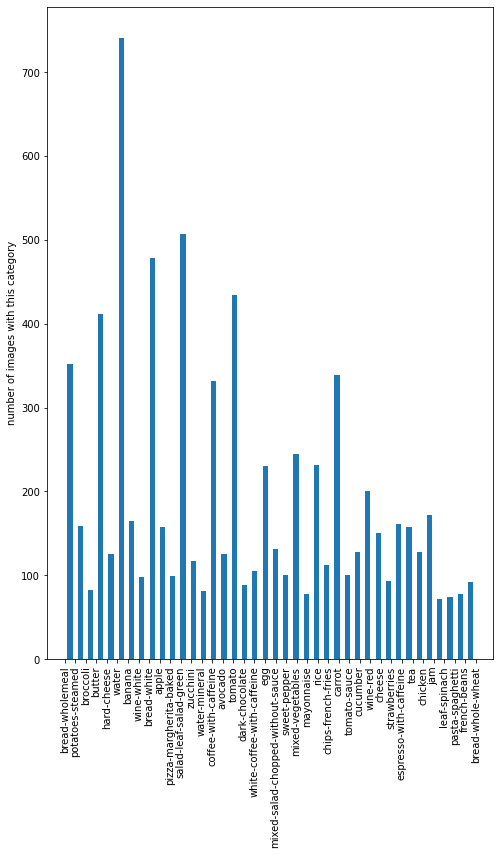

Category frequencies: [0.04550743 0.02055591 0.01073045 0.05326438 0.01616031 0.09579832 0.02133161 0.01266968 0.06179703 0.02042663 0.01279897 0.06554622 0.01512605 0.01047188 0.04292178 0.01616031 0.0561086  0.01150614
 0.01357466 0.02973497 0.01706529 0.01292825 0.03167421 0.01008403 0.02999354 0.01447964 0.04382676 0.01292825 0.01654816 0.02598578 0.01939237 0.01202327 0.02081448 0.02042663 0.01654816 0.02223659
 0.00930834 0.0095669  0.01008403 0.01189399]


In [35]:
category_frequencies = []

def show_category_frequencies():
  coco_categories_for_histogram = [coco_cat_id_to_name(anno["category_id"]) for anno in annotations]

  plt.figure(figsize=(8,12))
  hist, _, _ = plt.hist(coco_categories_for_histogram, len(category_names), rwidth=0.5)
  plt.ylabel("number of images with this category")
  plt.xticks(rotation=90)
  global category_frequencies
  category_frequencies = hist / hist.sum()
  plt.show()

show_category_frequencies()

print("Category frequencies:", category_frequencies)

#### Segmentations

In [36]:
if not "example mini image masks":
  example_mini_image_masks = np.zeros((N_CLASSES,3,3),dtype=SEG_DTYPE)

  example_mini_image_masks[2] = np.array([[1,1,1],[1,1,0],[1,0,0]])
  example_mini_image_masks[5] = np.array([[1,0,0],[1,1,0],[1,1,1]])

  print(example_mini_image_masks.shape)

  example_mini_image_masks[:6]

  for i in range(3):
    for j in range(3):
      print(f"{i},{j} -> ",fai_multi_cats_from_coco_ids.decode(example_mini_image_masks[:,i,j]))

35592 607 607


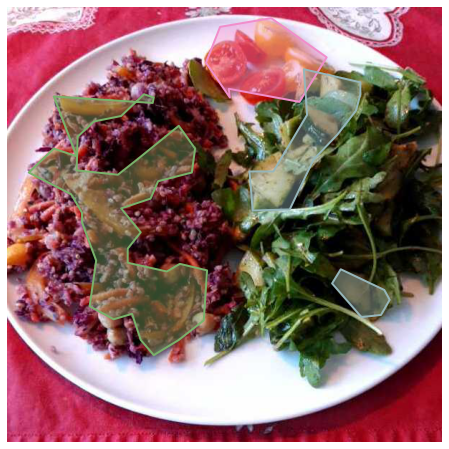

In [37]:
import skimage.io as io
imid = 30573
imid = 16387
imid = random.choice(image_ids)
im = coco.loadImgs(imid)[0]
im_annotations = coco.loadAnns(coco.getAnnIds(imgIds=imid))

image_path = os.path.join(Paths.TRAIN_IMAGES_DIR, im["file_name"])
plt.figure(figsize=(8,8))
I = io.imread(image_path)
plt.imshow(I)
plt.axis('off')
# Render annotations on top of the image
coco.showAnns(im_annotations)

print(imid,im["width"],im["height"])

In [38]:
def one_hot_id_from_coco_id(coco_id):
  return np.nonzero(fai_multi_cats_from_coco_ids([coco_id]))[0][0]

def convert_annotations_to_multimask(im_annotations, image_dict, debug=False):
  """Produces a mask of shape [N_CLASSES, w, h] where each seg_pixel (c,x,y) is either 1 (in class) or 0"""

  multi_seg_mask = np.zeros((N_CLASSES, image_dict["width"], image_dict["height"]),dtype=SEG_DTYPE)

  if debug:
    print("Image id", image_dict['id'])
    print("Image shape: ", image_dict['width'], image_dict['height'])

  for im_anno in im_annotations:
    encSeg = cocomask.frPyObjects(
        im_anno['segmentation']
        ,image_dict['width'], image_dict['height']
      )
    
    one_hot_id = one_hot_id_from_coco_id(im_anno["category_id"])
    
    if debug:
      print("Processing",im_anno['category_id'],"->",one_hot_id)
    
    org_seg = cocomask.decode(encSeg)

    if debug:
      print("Org seg shape ", org_seg.shape)
      print("Number of components of this label ", org_seg.shape[2])

    multi_component_segmentations = org_seg.reshape((image_dict['width'], image_dict['height'],-1))

    if debug:
      print("multi_component_segmentations.shape ", multi_component_segmentations.shape)

    category_seg = np.sum(multi_component_segmentations, axis=2)
    np.clip(category_seg,0,1,out=category_seg)

    assert category_seg.shape == (image_dict["width"],image_dict["height"])

    multi_seg_mask[one_hot_id] = category_seg

  return multi_seg_mask

Image id 35592
Image shape:  607 607
Processing 1022 -> 22
Org seg shape  (607, 607, 1)
Number of components of this label  1
multi_component_segmentations.shape  (607, 607, 1)
Processing 1069 -> 16
Org seg shape  (607, 607, 1)
Number of components of this label  1
multi_component_segmentations.shape  (607, 607, 1)
Processing 1056 -> 15
Org seg shape  (607, 607, 2)
Number of components of this label  2
multi_component_segmentations.shape  (607, 607, 2)
component = 0


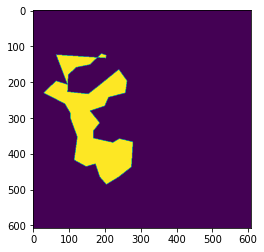

mask


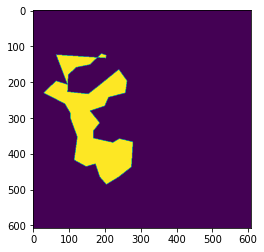

component = 0


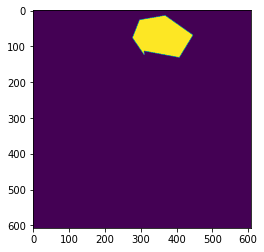

mask


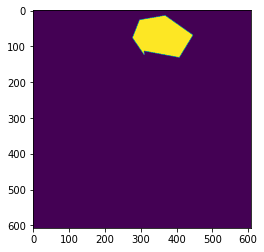

component = 0


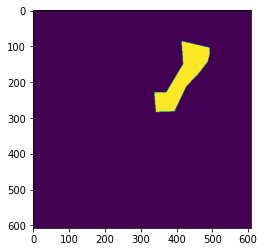

component = 1


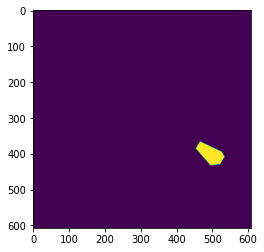

mask


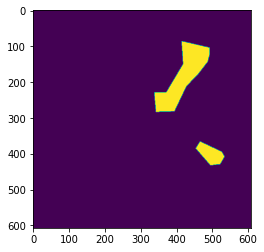

In [39]:
# test multi-label segmentation is correctly converted

import pycocotools
import pycocotools.mask as cocomask

result = convert_annotations_to_multimask(im_annotations,im,debug=True)

assert result.shape == (40, im["width"], im["height"])

for im_anno in im_annotations:
  encSeg = cocomask.frPyObjects(
      im_anno['segmentation']
      ,im['width'], im['height']
    )
  
  one_hot_id = one_hot_id_from_coco_id(im_anno['category_id'])

  m = cocomask.decode(encSeg)

  m = m.reshape((im['width'], im['height'], -1))
  for i in range(m.shape[2]):
    print("component =",i)
    plt.imshow(m[:,:,i])
    plt.show()
  
  print("mask")
  plt.imshow(result[one_hot_id])
  plt.show()

  assert np.all(m.sum(axis=2) == result[one_hot_id])

In [40]:
# Transform given annotations into our desired segmentations format

FORCE_RECOMPUTE = False

dest_segmentations_dir = None

def needs_recomputation(im_id):
  out_file = dest_segmentations_dir / f"{im_id}.npz"

  return FORCE_RECOMPUTE or not os.path.isfile(out_file)

def task(im_id):
  try:
    out_file = dest_segmentations_dir / f"{im_id}.npz"
    image_dict = coco.loadImgs(im_id)[0]
    im_annotations = coco.loadAnns(coco.getAnnIds(imgIds=im_id))
    multi_mask = convert_annotations_to_multimask(im_annotations, image_dict, debug=False)
    np.savez_compressed(out_file, multi_mask, allow_pickle=False)
  except Exception as e:
    print("Error: ", im_id)
    raise e

def preprocess_and_store_segmentations(im_ids):
  worker = prepareTask("task")
  inputs = [id for id in im_ids if needs_recomputation(id)]
  
  print(f"{len(inputs)} of {len(im_ids)} need segmentations to be recomputed.")
  with Pool(int(PAR_PROCS*3/2)) as p:
    with tqdm(total=len(im_ids)) as progress_bar:
      for _ in p.imap(worker, inputs):
        progress_bar.update(1)

In [41]:
def load_multi_segmentation(path):
  arr = None
  with np.load(path) as npz:
    arr = npz["arr_0"]
  return arr

In [42]:
dest_segmentations_dir = Paths.CURR_MULTI_SEG_DIR
preprocess_and_store_segmentations(tiny_train_imids)
print(list(os.listdir(Paths.CURR_MULTI_SEG_DIR))[:5],"...")

10 of 10 need segmentations to be recomputed.


  0%|          | 0/10 [00:00<?, ?it/s]

['47207.npz', '21729.npz', '39969.npz', '12542.npz', '16387.npz'] ...


In [43]:
if not "transform train data":
  dest_segmentations_dir = Paths.TRAIN_MULTI_SEG_DIR
  preprocess_and_store_segmentations(image_ids)
  print(list(os.listdir(Paths.TRAIN_MULTI_SEG_DIR))[:5],"...")

In [44]:
if FORCE_RECOMPUTE and not "we will not store it to google drive due ot it's slow read speed":
  store_directory_to_google_drive(Paths.TRAIN_MULTI_SEG_DIR)

In [45]:
def segmentation_size_fraction(seg):
  assert np.all(np.logical_or(seg == 0, seg == 1))
  assert seg.shape == (seg.shape[0],seg.shape[1])
  segSize = np.count_nonzero(seg)
  return float(segSize) / seg.size

def resize_mseg(mseg, debug=False):
  dest = np.zeros((N_CLASSES, IM_SZ,IM_SZ), dtype=SEG_DTYPE)
  for i in range(N_CLASSES):
    dest_seg_shape = (IM_SZ, IM_SZ)
    has_defined_segmentation_for_class = np.any(mseg[i] == 1)
    if not has_defined_segmentation_for_class:
      continue
    
    asimg = PIL.Image.fromarray(mseg[i]) # using autodetected PIL Image Modes: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
    # Pillow Image resize: https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize
    resized = asimg.resize(dest_seg_shape, resample=PIL.Image.NEAREST)
    resized = (np.array(resized, dtype=SEG_DTYPE) > 0.5).astype(SEG_DTYPE)

    if debug:
      print("original",i)
      plt.imshow(mseg[i])
      plt.show()
      print("resized",i)
      plt.imshow(resized)
      plt.show()

    assert resized.shape == dest_seg_shape
    assert np.all(np.logical_or(resized == 0,resized == 1))

    if "check fraction of segmentation is approx. equal":
      org_frac = segmentation_size_fraction(mseg[i])
      new_frac = segmentation_size_fraction(resized)
      abs_diff = np.abs(new_frac - org_frac)
      assert abs_diff < 0.01, f"Segmentation size fraction has changed during resizing. i {i}, original {org_frac}, new {new_frac}"
    
    dest[i] = resized

  return dest
  
if not "show transformed segmentations for data":
  for fname in fnames:
    print(f"{Path(fname).stem}")
    mseg = load_multi_segmentation(Paths.CURR_MULTI_SEG_DIR/f"{Path(str(int(fname.stem)))}.npz")
    resize_mseg(mseg, debug=True)


In [46]:
ls("curr/images",n=10)

008724.jpg
021729.jpg
032766.jpg
016387.jpg
039969.jpg
034743.jpg
036356.jpg
012542.jpg
047207.jpg
010525.jpg


In [47]:
ls("curr/segmentations",n=10)

47207.npz
21729.npz
39969.npz
12542.npz
16387.npz
34743.npz
36356.npz
8724.npz
32766.npz
10525.npz


### fastai DataLoader

In [48]:
# fastai delegation decorator: https://www.fast.ai/2019/08/06/delegation/

SEED=1337
# How to write a data block: https://docs.fast.ai/tutorial.datablock.html#Building-a-DataBlock-from-scratch
class MultiLabelSegmentationDataLoaders(DataLoaders):
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_label_func(cls, path, fnames, label_func, valid_pct=0.3, seed=None, codes=None, item_tfms=None, batch_tfms=None, **kwargs):
        dblock = DataBlock(blocks=(ImageBlock, TransformBlock),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        res = cls.from_dblock(dblock, fnames, path=path, **kwargs)
        return res

IM_SZ = 256
resize_args = (IM_SZ, fastbook.ResizeMethod.Squish)

fnames = get_image_files(Paths.CURR_IMAGES_DIR)

BATCH_SZ = min(N // 2, 5) # NOTE. Batch size is small due to GPU size limitations
dls = MultiLabelSegmentationDataLoaders.from_label_func(
  Paths.CURR_DATA_DIR, bs=BATCH_SZ, fnames = fnames,
  label_func = lambda o: resize_mseg(load_multi_segmentation(Paths.CURR_MULTI_SEG_DIR/f"{int(o.stem)}.npz")),
  codes = category_ids,
  item_tfms=Resize(*resize_args),
  seed = SEED
)


In [49]:
print("train",dls.train.n,dls.train.n_subsets)

print("valid",dls.valid.n,dls.valid.n_subsets)

assert len(dls.train) >= 1, "Training data generator is empty. Ensure, that the batch-size is small enough."
assert len(dls.valid) >= 1, "Validation data generator is empty. Ensure that the batch-size is small enough."

train 7 2
valid 3 2


### Loss Function

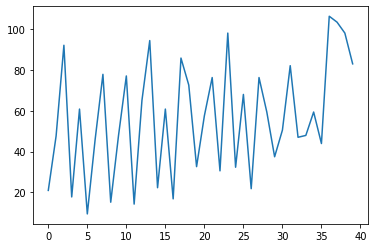

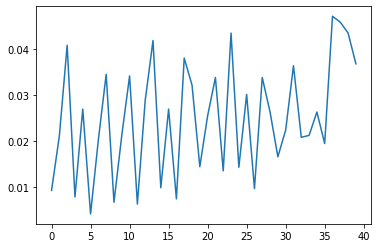

In [50]:
# category balancing for BCELogitsLoss and variants
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

category_weights = tensor((1 - category_frequencies) / category_frequencies, dtype=torch.float16)
# e.g. category_frequency = [0.3, 0.7]
# cat_rest_freq = [0.7, 0.3]
# weight = [2.33, 0.428]
category_weights_normalised = category_weights / category_weights.sum()

plt.plot(category_weights)
plt.show()
plt.plot(category_weights_normalised)
plt.show()

In [51]:
from enum import auto

broadcasted_weights = category_weights_normalised.reshape((1,N_CLASSES,1,1)).broadcast_to((1,N_CLASSES,2,2))

LOSS_MULTIPLIER = 1000 # used to prevent the loss from becoming to small

class LossType(Enum):
  
  CROSS_ENTROPY = (auto(),
    torch.nn.CrossEntropyLoss(reduction='mean', weight=category_weights_normalised.to(device=DEVICE))
  )
  
  MSE = (auto(),
    lambda x, y: torch.mean(torch.linalg.vector_norm(x - y, dim=(1,2,3)))
  )
  
  # MULTI_LABEL_MARGIN_LOSS = (auto(), torch.nn.MultiLabelMarginLoss(reduction='mean'))
  
  # ONLY USE THIS, IF NO SIGMOID IS IN THE LAST LAYER OF THE NETWORK ALREADY
  BINARY_CROSS_ENTROPY_WITH_LOGITS_LOSS = (auto(),
    torch.nn.BCEWithLogitsLoss(
      reduction='mean',
      pos_weight=category_weights.reshape((1,N_CLASSES,1,1)).to(device=DEVICE)
        # alt: tensor[np.newaxis,N_CLASSES,np.newaxis,np.newaxis]
        # Bug with pytorch in pos_weight: https://discuss.pytorch.org/t/loss-function-for-multi-class-semantic-segmentation/40596?u=ptrblck
  ))
  
  # ONLY USE THIS IF THERE IS A SIGMOID IN THE LAST LAYER OF THE NETWORK
  BINARY_CROSS_ENTROPY = (auto(),
    torch.nn.BCELoss(
      reduction='mean',
      weight=category_weights_normalised.reshape((1,N_CLASSES,1,1)).to(device=DEVICE)
    ))

  def apply(self, x, y):
    return self.value[1](x, y)

LOSS_FUNCTION = LossType.BINARY_CROSS_ENTROPY # BINARY_CROSS_ENTROPY_WITH_LOGITS_LOSS

def loss_func(x,y):
  assert x.shape == y.shape, f"Expected equal shapes, but got: {x.shape} and {y.shape}"
  assert x.shape[1:] == (N_CLASSES, IM_SZ, IM_SZ), f"Unexpected shape: {x.shape}"
  assert 1 <= x.shape[0] and x.shape[0] <= BATCH_SZ, f"Unexpected shape (batch): {x.shape}"
  
  result = LOSS_FUNCTION.apply(x, y) * LOSS_MULTIPLIER
  
  assert len(result.shape) == 0, f"Result should be scalar, but got: {result.shape}"
  return result

In [52]:
def loss_func_single(x, y):
  assert x.shape == y.shape
  assert x.shape == (N_CLASSES,IM_SZ, IM_SZ)
  x = tensor(x, dtype=torch.float32).to(device=DEVICE)
  y = tensor(y, dtype=torch.float32).to(device=DEVICE)
  return loss_func(x[None,:], y[None,:])

#### Adding a sigmoid in the end of the model

In [53]:
import fastai

def change_final_layer_to_return_sigmoid(model, debug=False):
  convLayer = None
  idx = None
  
  for i, layer in enumerate(model.layers[::-1]):
    # find last layer, which isn't a tensorbase
    if type(layer) == ToTensorBase:
      continue
    
    assert type(layer) == ConvLayer, f"Found {type(layer)}. Changing of activation function of last computation layer is only supported for conv layers"

    convLayer = layer
    idx = len(model.layers) - 1 - i
    assert model.layers[idx] == layer
    break
    
  convElt = convLayer[0]

  if debug:
    print("convLayer.add_module", convLayer.add_module)

  print(f"Changing last ConvLayer, idx = {idx}:", convLayer)

  assert type(convElt) == torch.nn.modules.Conv2d
  
  # https://webcache.googleusercontent.com/search?q=cache:3AvcftW0JUwJ:https://discuss.pytorch.org/t/append-for-nn-sequential-or-directly-converting-nn-modulelist-to-nn-sequential/7104+&cd=1&hl=de&ct=clnk&gl=de&client=firefox-b-d
  convLayer.add_module(str(len(convLayer)+1), nn.Sigmoid())
  
  print("Changed to:", model.layers[idx])
    

### Defining the model

In [54]:
learn = unet_learner(
  dls, resnet34,
  n_out = N_CLASSES,
  loss_func = loss_func,
  pretrained=True,
  wd = 0.01,
  # normalize = true ?
  # try dropout instead?
  cbs = ([SaveModelCallback(fname="test-end", at_end=True), SaveModelCallback(fname="test-valid-best")] if N >= 100 else []) +
    [TerminateOnNaNCallback()]
)
change_final_layer_to_return_sigmoid(learn.model)

print(learn.model,learn.summary())

# todo. how might we make this a fully convolutional pipeline?

if False:
  unet_learner(
    dls, models.alexnet,
    normalize=True, n_out=len(category_ids),
    pretrained=True, config=None,
    loss_func=None, opt_func=Adam,
    lr=0.001, metrics=None,
    model_dir='models', train_bn=True,
    blur=False, blur_final=True,
    self_attention=False, y_range=None, last_cross=True,
    bottle=False, norm_type=None
  )

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Changing last ConvLayer, idx = 12: ConvLayer(
  (0): Conv2d(99, 40, kernel_size=(1, 1), stride=(1, 1))
)
Changed to: ConvLayer(
  (0): Conv2d(99, 40, kernel_size=(1, 1), stride=(1, 1))
  (2): Sigmoid()
)


DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

### Visualize Batches and Multi-Label Segmentations

In [55]:
from matplotlib.colors import ListedColormap
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
from skimage import measure
import matplotlib.patheffects as PathEffects

matplotlib_colormaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

class_colormaps = (matplotlib_colormaps * 3)[:N_CLASSES]

if "add transparenc to default matplotlib colors":
  # ref: https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap
  class_colormaps = [ cmap(np.arange(cmap.N)) for name in class_colormaps for cmap in [plt.get_cmap(name)] ]
  for i in range(len(class_colormaps)):
    cmap = class_colormaps[i]
    cmap[:,-1] = np.linspace(0, 1, cmap.shape[0]).clip(0,1)
    class_colormaps[i] = ListedColormap(cmap)
    # print(class_colormaps[i])

BOUNDARY_SIZE = 6
SOFT_FILL_FACTOR = 0.05

def show_multi_segmentation(ax, seg, alpha = 0.75, title_suffix=""):
  "Show a multi-label segmentation ontop of the existing figure where the image is shown."
  
  seg = np.array(seg.cpu(), dtype=SEG_DTYPE)
  nDefined = len([0 for i in range(N_CLASSES) if np.any(seg[i] != 0)])
  
  ax.set_title(f"{nDefined} classes{title_suffix}", size="large")
  
  kernel = np.ones((BOUNDARY_SIZE*2+1,BOUNDARY_SIZE*2+1), dtype=np.int16)

  assert seg.shape[0] == N_CLASSES
  assert seg.shape[1] == seg.shape[2]
  
  for i in range(N_CLASSES):
    is_defined_for_class = np.any(seg[i] != 0)
    
    if is_defined_for_class:
      boundary = np.minimum(binary_dilation(seg[i] == 0, kernel),seg[i])
      boundaryWithSoftFill = (boundary + seg[i]*SOFT_FILL_FACTOR).clip(0,1)
      
      res = ax.imshow(boundaryWithSoftFill, cmap=class_colormaps[i], alpha=alpha, label=category_names[i])
      
      components, nComps = measure.label(boundaryWithSoftFill, return_num=True)
      centers = center_of_mass(boundaryWithSoftFill, components, index=list(range(1, nComps+1)))
      for (x,y) in centers:
        ax.text(y, x, category_names[i],
          c=class_colormaps[i].colors[-1],
          alpha=1-(1-alpha)/2,
          size="medium", horizontalalignment="center",
          path_effects=[PathEffects.withStroke(linewidth=3.5, foreground='w')],
          bbox=dict(fill=True, facecolor=(1,1,1,0.1), linewidth=0)
        )

In [56]:
SHOW_FIG_SIZE = 15

def show_image(ax, img):
  img = Resize(*resize_args)(img) # reizse before display
  ax.imshow(img.cpu().permute((1,2,0)))
  ax.axis('off')

def show_images_with_segmentations(images, *segsList, name=None, gtsIdx=None):
  
  n = len(images)
  
  print(f"============================ {name}, n={n} ============================")
  
  for segsIdx, segs in enumerate(segsList):
    fig, axes = plt.subplots(1,n)
    fig.set_figheight(SHOW_FIG_SIZE)
    fig.set_figwidth(SHOW_FIG_SIZE)
    fig.tight_layout()

    for i in range(n):
      img, seg = images[i], segs[i]
      assert img.shape[0] == 3 and img.shape[1] == img.shape[2], img.shape
      assert seg.shape == (N_CLASSES, IM_SZ, IM_SZ), seg.shape
      
      title_suffix = f",seg={segsIdx}"
      
      if gtsIdx is not None:
        gt = segsList[gtsIdx][i]
        loss = loss_func_single(seg, gt)
        title_suffix = f"{title_suffix},loss={loss:.05f}"
        
      show_image(axes[i], img)
      show_multi_segmentation(axes[i], seg, title_suffix=title_suffix)
    
def convert_processed_images_to_natural_original_images(dl, preprocessed_images):
  originals = dl.after_batch.decode(preprocessed_images)
  #resized = [ Resize(*resize_args)(im) for im in originals ]
  #torch.stack(resized)
  return originals
    
def show_batch(name):
  dl = getattr(dls, name)
  images, segs = dl.one_batch()
  natural_images = convert_processed_images_to_natural_original_images(dl, images)
  show_images_with_segmentations(natural_images, segs, name=name)

============================ train, n=5 ============================


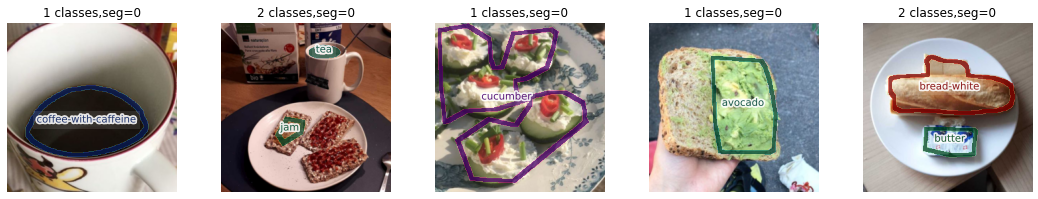

In [57]:
show_batch("train")

============================ valid, n=3 ============================


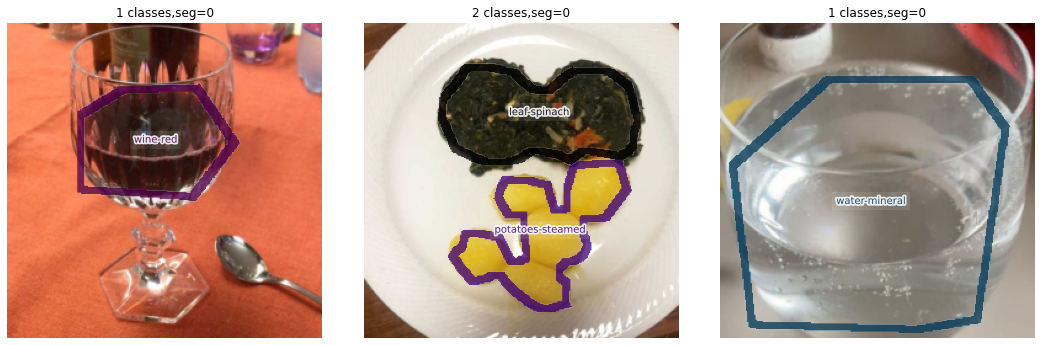

In [58]:
show_batch("valid")

In [59]:
def stats(arrname):
  arr = tensor(eval(arrname))
  print(arrname + ":", arr.shape, arr.dtype, arr.max(), arr.min())

if not "debug, difference between train and train_ds in fastai data loader":

  a = dls.train_ds[0][0]
  b = IMAGE_ITEM_TFMS(dls.train_ds[0][0])

  stats("a")
  stats("b")

  c = dls.train.one_batch()[0][0]
  d = IMAGE_ITEM_TFMS(dls.train.one_batch()[0][0])
  stats("c")
  stats("d")

### Run Training

In [60]:
FORCE_TRAIN=False

# todo. rename and cleanup keys and refactor new parameters generation
m00 = "m00-resnet34-epoch5"
m01 = "m01-resnet34-epoch700"
m02 = "m02resnet34-epoch30-n1000"
m03 = "m02-resnet34-epoch20-n5545"
m04 = "m02-resnet34-epoch15-n600-freeze_epochs5"
m04_2 = "m04_2-resnet34-epoch5-n600-freeze_epochs15"
m05 = "m05-resnet50-epoch1000-n10-freeze_epochs0"
m05_2 = "m05_2-resnet50-epoch1500-n4-freeze_epochs0"
m07 = "m07-resnet34-epoch1400-n10-freeze_epochs0-lossBCELoss"
m08 = "m08-resnet34-epoch20-n1000-freeze_epochs0-lossBCELoss"
m09 = "m09-resnet34-epoch30-n5545-freeze_epochs0-lossBCELoss"
m09end = "m09-resnet34-epoch30-n5545-freeze_epochs0-lossBCELoss-model-end"
#m06 = "m06-resnet50-epoch20-n5545-freeze_epochs0"
mcurr = "current" # only for temporary usage. not stored in storage

modelToTrain = mcurr

if modelToTrain in storage_list_artifacts() and not FORCE_TRAIN and modelToTrain != mcurr:
  print(f"Found model {modelToTrain} in sotrage artifacts. Downloading model...")
  storage_retrieve_artifact_by_name(modelToTrain)
  learn = learn.load(modelToTrain)
  print("Done.")
else:
  # currently experiemented with temporary training procedure
  if modelToTrain == mcurr:
    learn.fine_tune(10, freeze_epochs=0)
  
  elif modelToTrain == m00:
    learn.fine_tune(5, freeze_epochs=1)
    
  elif modelToTrain == m01:
    learn.fine_tune(700, freeze_epochs=1)
    
  elif modelToTrain == m02:
    learn.fine_tune(30, freeze_epochs=1)
    
  elif modelToTrain == m03:
    learn.fine_tune(20, freeze_epochs=1)
    
  elif modelToTrain == m04:
    learn.fine_tune(15, freeze_epochs=5)
    
  elif modelToTrain == m04_2:
    learn.fine_tune(5, freeze_epochs=15)
    
  elif modelToTrain == m05:
    learn.fine_tune(1000, freeze_epochs=0)
    
  elif modelToTrain == m05_2:
    learn.fine_tune(1500, freeze_epochs=0)
    
  elif modelToTrain == m07:
    learn.fine_tune(700, freeze_epochs=0)
    
  elif modelToTrain == m08:
    learn.fine_tune(20, freeze_epochs=0)
    
  elif modelToTrain == m09:
    learn.fine_tune(30, freeze_epochs=0)
    
  else:
    # learn.show_training_loop()
    # learn.fine_tune(10)
    # learn.fit_one_cycle(5)
    raise NotImplementedError

  learn.save(modelToTrain)
  if modelToTrain != mcurr:
    print("Finished training. Saving model as storage artifact.")
    storage_store_artifact_by_name(Path("curr") / "models" / (modelToTrain + ".pth"), modelToTrain, force=True)

  # TODO. write code, that makes it easier to load and use the end and valid-best models.

In [61]:
# TODOs.
# * augmentation
# * loss curve plotting and saving

In [62]:
storage_list_artifacts()

['m00-resnet34-epoch5',
 'm01-resnet34-epoch700',
 'm02-resnet34-epoch15-n600-freeze_epochs5',
 'm02-resnet34-epoch20-n5545',
 'm02resnet34-epoch30-n1000',
 'm04_2-resnet34-epoch5-n600-freeze_epochs15',
 'm05-resnet50-epoch1000-n10-freeze_epochs0',
 'm05_2-resnet50-epoch1500-n4-freeze_epochs0',
 'm07-resnet34-epoch1400-n10-freeze_epochs0-lossBCELoss',
 'm08-resnet34-epoch20-n1000-freeze_epochs0-lossBCELoss',
 'm09-resnet34-epoch30-n5545-freeze_epochs0-lossBCELoss',
 'm09-resnet34-epoch30-n5545-freeze_epochs0-lossBCELoss-model-end']

In [63]:
ls("curr/models")

current.pth


In [64]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  678636 KB |    2216 MB |   68120 MB |   67458 MB |
|       from large pool |  644416 KB |    2173 MB |   66977 MB |   66347 MB |
|       from small pool |   34220 KB |      44 MB |    1143 MB |    1110 MB |
|---------------------------------------------------------------------------|
| Active memory         |  678636 KB |    2216 MB |   68120 MB |   67458 MB |
|       from large pool |  644416 KB |    2173 MB |   66977 MB |

In [65]:
# results of a debugging session on the loss

if not "demonstrate":
  ones = torch.ones((1,5,2,2), dtype=torch.float32).to(device=DEVICE)

  halfs = ones/2

  zeros = torch.zeros((1,5,2,2), dtype=torch.float32).to(device=DEVICE)

  lf_old = torch.nn.BCEWithLogitsLoss(
        reduction='mean',
        #pos_weight=category_weights.reshape((1,N_CLASSES,1,1)).to(device=DEVICE)
          # alt: tensor[np.newaxis,N_CLASSES,np.newaxis,np.newaxis]
          # Bug with pytorch in pos_weight: https://discuss.pytorch.org/t/loss-function-for-multi-class-semantic-segmentation/40596?u=ptrblck
    )

  lf_new = torch.nn.BCELoss(
        reduction='mean', # note. no weight balancing here
    )

  org_weights = tensor([1,2,3,4,5],dtype=torch.float32)
  ws = org_weights.reshape((1,5,1,1))

  assert torch.all(ws.mean(dim=(0,2,3)) == org_weights)

  lf_new_bal = torch.nn.BCELoss(
        reduction='mean',
        weight=ws.to(device=DEVICE)
  )


  def print_eval(s):
    print(s +": ", eval(s))

  print_eval("lf_old(ones,zeros)")
  print_eval("lf_old(zeros,zeros)")
  print_eval("lf_old(ones,halfs)")

  print_eval("lf_new(ones,zeros)")
  print_eval("lf_new(zeros,zeros)")
  print_eval("lf_new(ones,halfs)")

  print_eval("lf_new_bal(ones,zeros)")
  print_eval("lf_new_bal(zeros,zeros)")
  print_eval("lf_new_bal(ones,halfs)")

  # todo. continue debugging here. the losses here yet do not make sense...

  # Next step. Make last activation in neural network a sigmoid OR add utilities, that the neural network
  # output is fed through a sigmoid whenever we want to take a look at it's results.

  # DECISION: Using last step in neural network as sigmoid and then using BCELoss

In [66]:
def show_results(name):
  dl = getattr(dls, name)
  preprocessed_images, gts = dl.one_batch()
  natural_images = convert_processed_images_to_natural_original_images(dl, preprocessed_images)
  gts = gts.cpu()
  
  with learn.no_bar():
    pred_segs = torch.stack([ learn.predict(im.cpu())[0] for im in natural_images])
  
  threshold = 0.5
  pred_segs_thr = (pred_segs >= threshold).float()
  
  show_images_with_segmentations(natural_images, gts, pred_segs_thr, name=name, gtsIdx=0)

============================ train, n=5 ============================


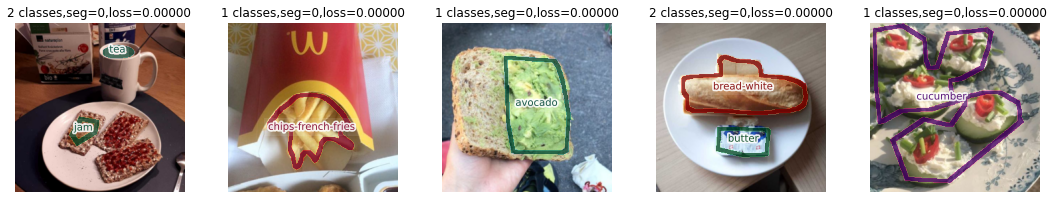

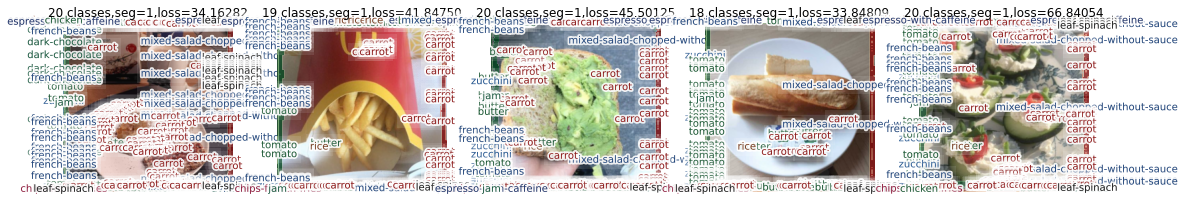

In [67]:
show_results("train")

============================ valid, n=3 ============================


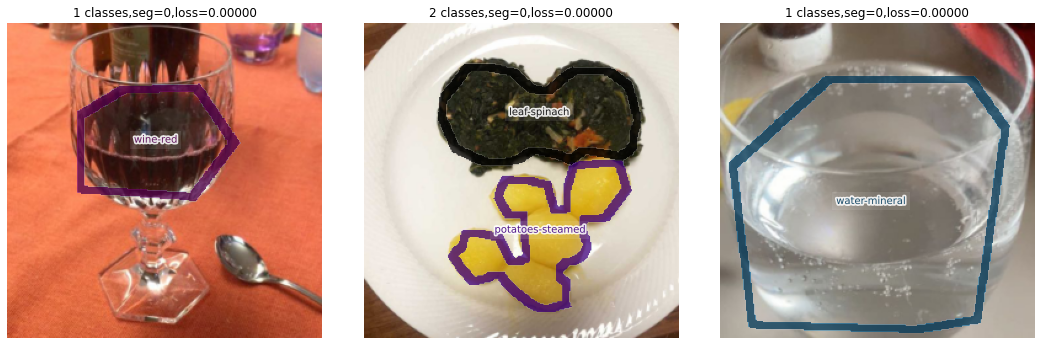

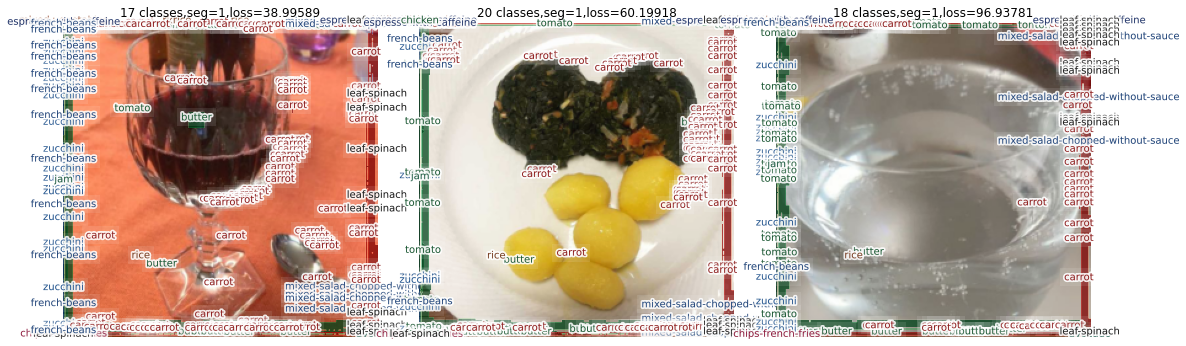

In [68]:
show_results("valid")

In [69]:
assert False, "NOTEBOOK_ENDS_HERE"

AssertionError: ignored

# Initialize detectron2

In [ ]:
_ = setup_logger()

register_coco_instances(DatasetLabels.TRAIN, {}, Paths.TRAIN_ANNOTATIONS, Paths.TRAIN_IMAGES_DIR)
register_coco_instances(DatasetLabels.VAL, {}, Paths.VAL_ANNOTATIONS, Paths.VAL_IMAGES_DIR)

# Build your Model 🏭

We will use Mask R-CNN to generate the segmentation masks for the food items 🌯

## Configure detectron2

Detectron2 has a variety of Instance Segmentation Models. We will use the zoo model with Mask RCNN + ResNet 50. If you want to try other models, you can find them [here]((https://github.com/facebookresearch/detectron2).

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = (DatasetLabels.TRAIN,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 273  # Number of output classes

cfg.OUTPUT_DIR = "outputs"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

## Load the pre-trained weights 

In [ ]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2

## Hyperparameters

In [ ]:
cfg.SOLVER.BASE_LR = 0.00025  # Learning Rate
cfg.SOLVER.MAX_ITER = 20000  # MAx Iterations
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # Batch Size

# Train the model 🚂

We will setup tensorboard to check the performance of the model while it is training.

## Setting up Tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir outputs

## Train the Model

In [ ]:
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

# Evaluating the model 🧪

We will check the performance of our model on the validation dataset.

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = (DatasetLabels.VAL, )
predictor = DefaultPredictor(cfg)

## Generate predictions on validation data 

In [ ]:
evaluator = COCOEvaluator(DatasetLabels.VAL, cfg, False, output_dir=cfg.OUTPUT_DIR)
data_loader = build_detection_test_loader(cfg, DatasetLabels.VAL)
results = inference_on_dataset(predictor.model, data_loader, evaluator)

## Visualizing the results 👓

Numbers are good, but visualizations are better!

In [ ]:
metadata = MetadataCatalog.get(DatasetLabels.VAL)

# Load the training annotations if not loaded
if not validation_annotations:
  with open(Paths.VAL_ANNOTATIONS) as json_file:
      annotations = json.load(json_file)

## Check the predictions

**Note:** If you are not able to see segmentation masks on the images, that generally means that the model didn't predict a mask for that image. You can verify this by doing

```python
predictions = predictor(img)
print(predictions)
```

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 180


# Visualize some random images
for i in range(8):
  image_filename = np.random.choice(validation_annotations.get("images")).get("file_name")
  image_filename = os.path.join(Paths.VAL_IMAGES_DIR, image_filename)

  img = cv2.imread(image_filename)
  predictions = predictor(img)

  v = Visualizer(img[:, :, ::-1],
    metadata=metadata, 
    scale=0.5, 
    # instance_mode=ColorMode.IMAGE_BW
  )
  annotated_image = v.draw_instance_predictions(predictions["instances"].to("cpu"))

  plt.subplot(2, 4, i+1)
  plt.axis('off')
  plt.imshow(annotated_image.get_image())

# A note on class ID mappings

Here is how the category object looks like

```json
{
  "id": 2578,
  "name": "water",
  "name_readable": "Water",
  "supercategory": "food"
}
```

Detectron2 usually maps the category IDs to contiguous numbers. For example, consider the following categories,

```json
[
  {
    "id": 2578,
    "name": "water",
    "name_readable": "Water",
    "supercategory": "food"
  },
  {
    "id": 1157,
    "name": "pear",
    "name_readable": "Pear",
    "supercategory": "food"
  },
  {
    "id": 2022,
    "name": "egg",
    "name_readable": "Egg",
    "supercategory": "food"
  }
]
```

Detectron internally maps these categories to something like

```json
{
  0: 2578, # detectron_id: actual_class_id
  1: 1157,
  2: 2022
}
```

So, when your model detects water, the prediction class ID that your model returns will be `0` and **not** `2578` . You should make sure to map these detectron IDs to their original actual class IDs for your submission to get scored properly.

Here's how you can get this mapping.

In [ ]:
coco_api = COCO(Paths.TRAIN_ANNOTATIONS)

category_ids = sorted(coco_api.getCatIds())
categories = coco_api.loadCats(category_ids)

class_to_category = { int(class_id): int(category_id) for class_id, category_id in enumerate(category_ids) }

with open("class_to_category.json", "w") as fp:
  json.dump(class_to_category, fp)

# Ready? Submit to AIcrowd 🚀

Now you can submit the trained model to AIcrowd!

## Submission configuration ⚙️

In [ ]:
aicrowd_submission = {
    "author": "<your name>",
    "username": "<your aicrowd username>",
    "description": "initial submission with detectron",
    "debug": False,
    "model_path": "outputs/model_final.pth",
    "model_type": "model_zoo",
    "model_config_file": "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml",
    "detectron_model_config": {
      "ROI_HEADS": {
        "SCORE_THRESH_TEST": 0.5,
        "NUM_CLASSES": 273
      }
    }
}

aicrowd_submission["description"] = aicrowd_submission["description"].replace(" ", "-")
with open("aicrowd.json", "w") as fp:
  json.dump(aicrowd_submission, fp)

## Submit to AIcrowd

**Note:** We will create an SSH key on your google drive. This key will be used to identify you on gitlab.aicrowd.com.

In [ ]:
!bash <(curl -sL https://gitlab.aicrowd.com/jyotish/food-recognition-challenge-detectron2-baseline/raw/master/utils/submit-colab.sh)

# 📎 Important Links

* 💪 Challenge Page: https://www.aicrowd.com/challenges/food-recognition-challenge
* 🗣 Discussion Forum: https://discourse.aicrowd.com/c/food-recognition-challenge
* 🏆 Leaderboard: https://www.aicrowd.com/challenges/food-recognition-challenge/leaderboards  